In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

# move '排行数值' to the last column
df = pd.read_csv('data/aggregated_data/combined_data.csv')
df_columns = list(df.columns)
df_columns.remove('排行数值')
df_columns.append('排行数值')
df = df[df_columns]
df.head()

# convert column '排行数值' with value > 0 to 1
def categorize_ranking(row):
    if (row['排行数值'] > 0):
        return 1
    else:
        return 0

df['排行数值'] = df.apply(categorize_ranking, axis = 1)
df.groupby(['qid', '排行数值']).count()

商品名称数值  价格数值  销量数值  好评数值  差评数值  有图评论数值  类目ID数值  下架时间数值  免运费数值  新品数值  \
qid 排行数值                                                                        
0   0        543   543   543   543   543     543     543     543    543   543   
    1        476   476   476   476   476     476     476     476    476   476   
1   0        630   630   630   630   630     630     630     630    630   630   
    1        541   541   541   541   541     541     541     541    541   541   
2   0        382   382   382   382   382     382     382     382    382   382   
    1        321   321   321   321   321     321     321     321    321   321   
3   0        245   245   245   245   245     245     245     245    245   245   
    1        204   204   204   204   204     204     204     204    204   204   
4   0        410   410   410   410   410     410     410     410    410   410   
    1        339   339   339   339   339     339     339     339    339   339   
5   0        564   564   564   564   564     564     564     564    564   564   
    1        489   489   489   489   489     489     489     489    489   489   
6   0        592   592   592   592   592     592     592     592    592   592   
    1        501   501   501   501   501     501     501     501    501   501   
7   0        578   578   578   578   578     578     578     578    578   578   
    1        483   483   483   483   483     483     483     483    483   483   
8   0        585   585   585   585   585     585     585     585    585   585   
    1        496   496   496   496   496     496     496     496    496   496   
9   0        504   504   504   504   504     504     504     504    504   504   
    1        419   419   419   419   419     419     419     419    419   419   
10  0        564   564   564   564   564     564     564     564    564   564   
    1        497   497   497   497   497     497     497     497    497   497   
11  0        204   204   204   204   204     204     204     204    204   204   
    1        173   173   173   173   173     173     173     173    173   173   
12  0         57    57    57    57    57      57      57      57     57    57   
    1         46    46    46    46    46      46      46      46     46    46   
13  0         22    22    22    22    22      22      22      22     22    22   
    1         19    19    19    19    19      19      19      19     19    19   
14  0        546   546   546   546   546     546     546     546    546   546   
    1        479   479   479   479   479     479     479     479    479   479   
...          ...   ...   ...   ...   ...     ...     ...     ...    ...   ...   
32  0        341   341   341   341   341     341     341     341    341   341   
    1        286   286   286   286   286     286     286     286    286   286   
33  0        553   553   553   553   553     553     553     553    553   553   
    1        462   462   462   462   462     462     462     462    462   462   
34  0        533   533   533   533   533     533     533     533    533   533   
    1        458   458   458   458   458     458     458     458    458   458   
35  0        551   551   551   551   551     551     551     551    551   551   
    1        466   466   466   466   466     466     466     466    466   466   
36  0        485   485   485   485   485     485     485     485    485   485   
    1        412   412   412   412   412     412     412     412    412   412   
37  0        519   519   519   519   519     519     519     519    519   519   
    1        444   444   444   444   444     444     444     444    444   444   
38  0        516   516   516   516   516     516     516     516    516   516   
    1        511   511   511   511   511     511     511     511    511   511   
39  0        584   584   584   584   584     584     584     584    584   584   
    1        499   499   499   499   499     499     499     499    499   499   
40  0        561   561   561   561   561 

In [2]:
# Logistic Regression
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/Users/zhaoyuanjie/miniconda3/envs/bursthunter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[4329,  856],
       [2724, 1780]])

Text(0.5, 257.44, 'Predicted label')

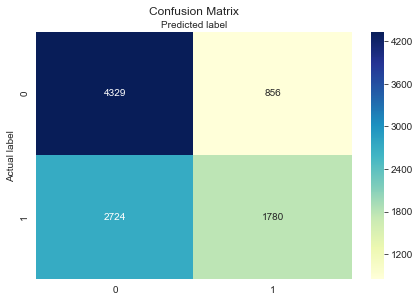

In [3]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [4]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.6305088244400867
Precision:  0.6752655538694993
Recall:  0.39520426287744226


auc: 0.6464327219692


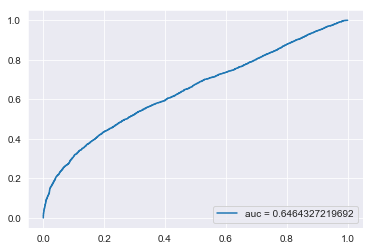

In [5]:
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(f"auc: {auc}")
plt.plot(fpr,tpr,label=f"auc = {auc}")
plt.legend(loc=4)
plt.show()

In [6]:
coefficients = pd.DataFrame({ "Feature": X_train.columns, "Coefficients": np.transpose(model.coef_).flatten() })
coefficients

,Feature,Coefficients
0,qid,-0.000310
1,商品名称数值,-0.098760
2,价格数值,1.106790
3,销量数值,6.561618
4,好评数值,4.556147
5,差评数值,2.972698
6,有图评论数值,5.368162
7,类目ID数值,-0.447010
8,下架时间数值,0.000000
9,免运费数值,-0.349370


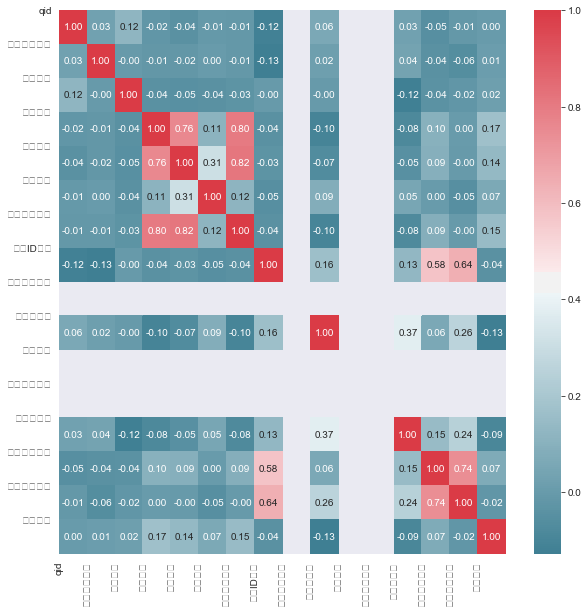

In [7]:
corr = df.corr()

colormap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()